In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [3]:
import pandas as pd

# 第一个文件
file_path0 = 'ibm_kyiv.csv'
df0 = pd.read_csv(file_path0)
df0['location'] = 'kyiv'  # 添加标识列

metric = 'ARG'
metric2 = 'quantum'


# 手动添加 'location' 列
df0['location'] = 'kyiv'

# 第二个文件
file_path1 = 'ibm_brisbane.csv'
df1 = pd.read_csv(file_path1)
df1['location'] = 'brisbane'  # 添加标识列


# 手动添加 'location' 列
df1['location'] = 'brisbane'

# 合并两个文件的处理结果
grouped_df = pd.concat([df0, df1], ignore_index=True)
grouped_df.head()


,pksid,pkid,pbid,layers,variables,constraints,method,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,location
0,0,0,0,5,6,3,HeaSolver,2.148438,6.640625,93.074219,31,1.400736,371.256700,17408,kyiv
1,0,0,0,5,6,3,PenaltySolver,0.976562,7.031250,92.412820,31,1.336949,372.522990,17408,kyiv
2,0,0,0,1,6,3,ChocoSolver,6.250000,12.304688,59.973366,16,0.673325,234.301980,9216,kyiv
3,0,0,0,5,6,3,QtoSolver,0.976562,8.398438,87.820490,31,1.726111,2172.211736,17408,kyiv
4,0,0,0,5,6,3,QtoSimplifySolver,1.171875,5.859375,95.094815,31,1.543664,2169.610302,17408,kyiv


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 计算平均值，只保留与绘图相关的数据
grouped_df_avg = grouped_df.groupby(['method', 'location'], as_index=False).agg({
    metric: ['mean', 'std'], 
    'quantum': ['mean', 'std'], 
    'classcial': ['mean', 'std'], 
    'in_constraints_probs': ['mean', 'std']
})
grouped_df_avg

method  location         ARG             \
                                                       mean        std   
0                         ChocoSolver  brisbane   84.385701  78.954481   
1                         ChocoSolver      kyiv   96.947285  82.748658   
2                           HeaSolver  brisbane   97.219238  81.877146   
3                           HeaSolver      kyiv  100.971809  78.918468   
4                       PenaltySolver  brisbane   92.622936  73.897168   
5                       PenaltySolver      kyiv  101.332394  82.532900   
6   QtoSimplifyDiscardSegmentedSolver  brisbane    0.222519   0.144622   
7   QtoSimplifyDiscardSegmentedSolver      kyiv    0.233704   0.163791   
8            QtoSimplifyDiscardSolver  brisbane   67.796103  37.931227   
9            QtoSimplifyDiscardSolver      kyiv   70.769760  40.534948   
10                  QtoSimplifySolver  brisbane   91.400000  71.839293   
11                  QtoSimplifySolver      kyiv   98.806167  76.770631   
12                          QtoSolver  brisbane   96.785867  82.640411   
13                          QtoSolver      kyiv   97.106423  72.031577   

         quantum                classcial            in_constraints_probs  \
            mean           std       mean        std                 mean   
0     310.439819     90.540039   2.017656   1.517864             8.154297   
1     279.277615     32.775721   2.470809   1.420167             6.347656   
2     453.082476    136.591209   4.235445   3.157965             3.515625   
3     483.116486     94.477777   5.067576   2.980777             3.593750   
4     470.412122    120.114020   4.352175   3.092506             4.248047   
5     483.297919     94.459020   5.203294   3.068419             3.476562   
6   15887.461895   9604.824534  17.415190  14.155998           100.000000   
7   19182.362397  16595.280686  20.484467  14.874181           100.000000   
8     575.494248    679.777474   3.380229   2.660873             8.089193   
9     584.070038    531.300717   4.001626   2.768486             7.158203   
10   1939.420471    999.015102   4.265321   2.513863             3.450521   
11   1382.710459    747.793330   5.210261   2.667135             3.955078   
12   1306.636061    952.906996   4.053326   2.730914             3.320312   
13    949.495439    695.029354   5.149262   2.787746             3.964844   

                  
             std  
0   6.546545e+00  
1   7.239886e+00  
2   2.176502e+00  
3   1.706699e+00  
4   2.680740e+00  
5   1.987364e+00  
6   0.000000e+00  
7   9.780581e-15  
8   4.986789e+00  
9   4.194866e+00  
10  2.180216e+00  
11  1.857091e+00  
12  1.623456e+00  
13  2.044629e+00

[100.97180900738803]
[101.33239370784656]
[96.94728492308951]
[0.2337038889137693]
[3.59375]
[3.4765625]
[6.34765625]
[100.0]
[97.21923833975552]
[92.6229364831807]
[84.38570087934738]
[0.22251914674181716]
[3.515625]
[4.248046875]
[8.154296875]
[100.0]


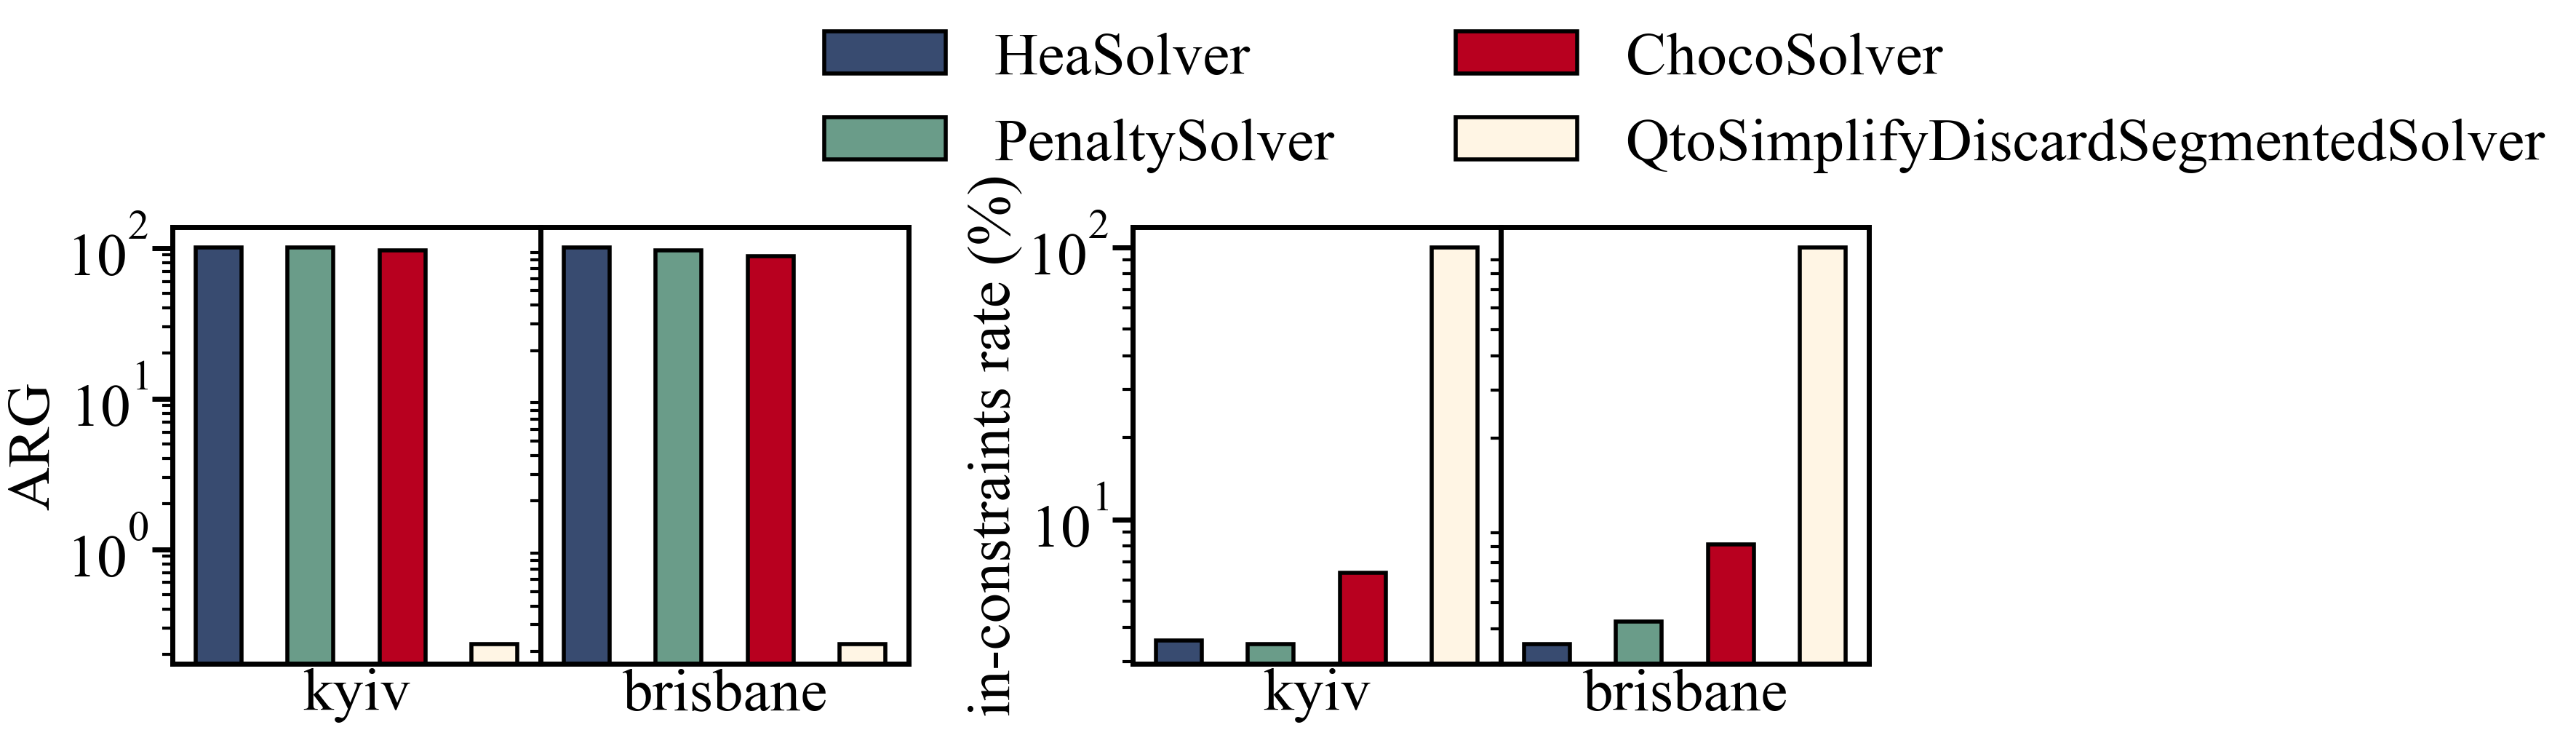

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
# 定义方法和设备
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSegmentedSolver']
locations = ['kyiv', 'brisbane']  # 分类依据：location


# 设置颜色和柱宽
move = 0.2  # 用于计算位置偏移
visible_bar_width = 0.1  # 实际柱子宽度
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['', '', '', '']
metric = 'in_constraints_probs'

# 绘图
for i, location in enumerate(locations):
    for j, metric in enumerate(['ARG','in_constraints_probs']):
        ax = plt.axes((j * 0.6+i*0.23, 0, 0.23, 0.5))  

        for idx, method in enumerate(methods):
    #         # 获取当前设备和方法的数据
            data = grouped_df_avg[grouped_df_avg['location'] == location]
            method_data = data[data['method'] == method]
            y = method_data[metric]['mean'].values.tolist()
            plt.bar(
                idx * move,  # 调整柱子位置以使分组居中
                y,
                visible_bar_width,  # 固定的显示宽度
                color=colors[idx],
                edgecolor="black",
                label=method,
                linewidth=4,
            )
            print(y)
        plt.xticks([])  # 显示 pkid 作为 x 轴
        plt.xlabel(location)
        plt.yscale('log')
        plt.xlim(-0.1, 0.7)
        if j == 0 and i == 0:
            plt.ylabel('ARG')
        elif j == 1 and i == 0:
            plt.ylabel('in-constraints rate (%)')
        else:
            plt.yticks([])

    # plt.ylim(0.1, 150)
    # plt.grid(True, linestyle='--', linewidth=1.5, axis='y')

plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2)
# ax = plt.axes((0, 0, 1, 1))
plt.savefig('realqpu.svg', bbox_inches='tight')


0.021375767822097987 276.4470211388162
0.021391614371398464 161.54956034493804


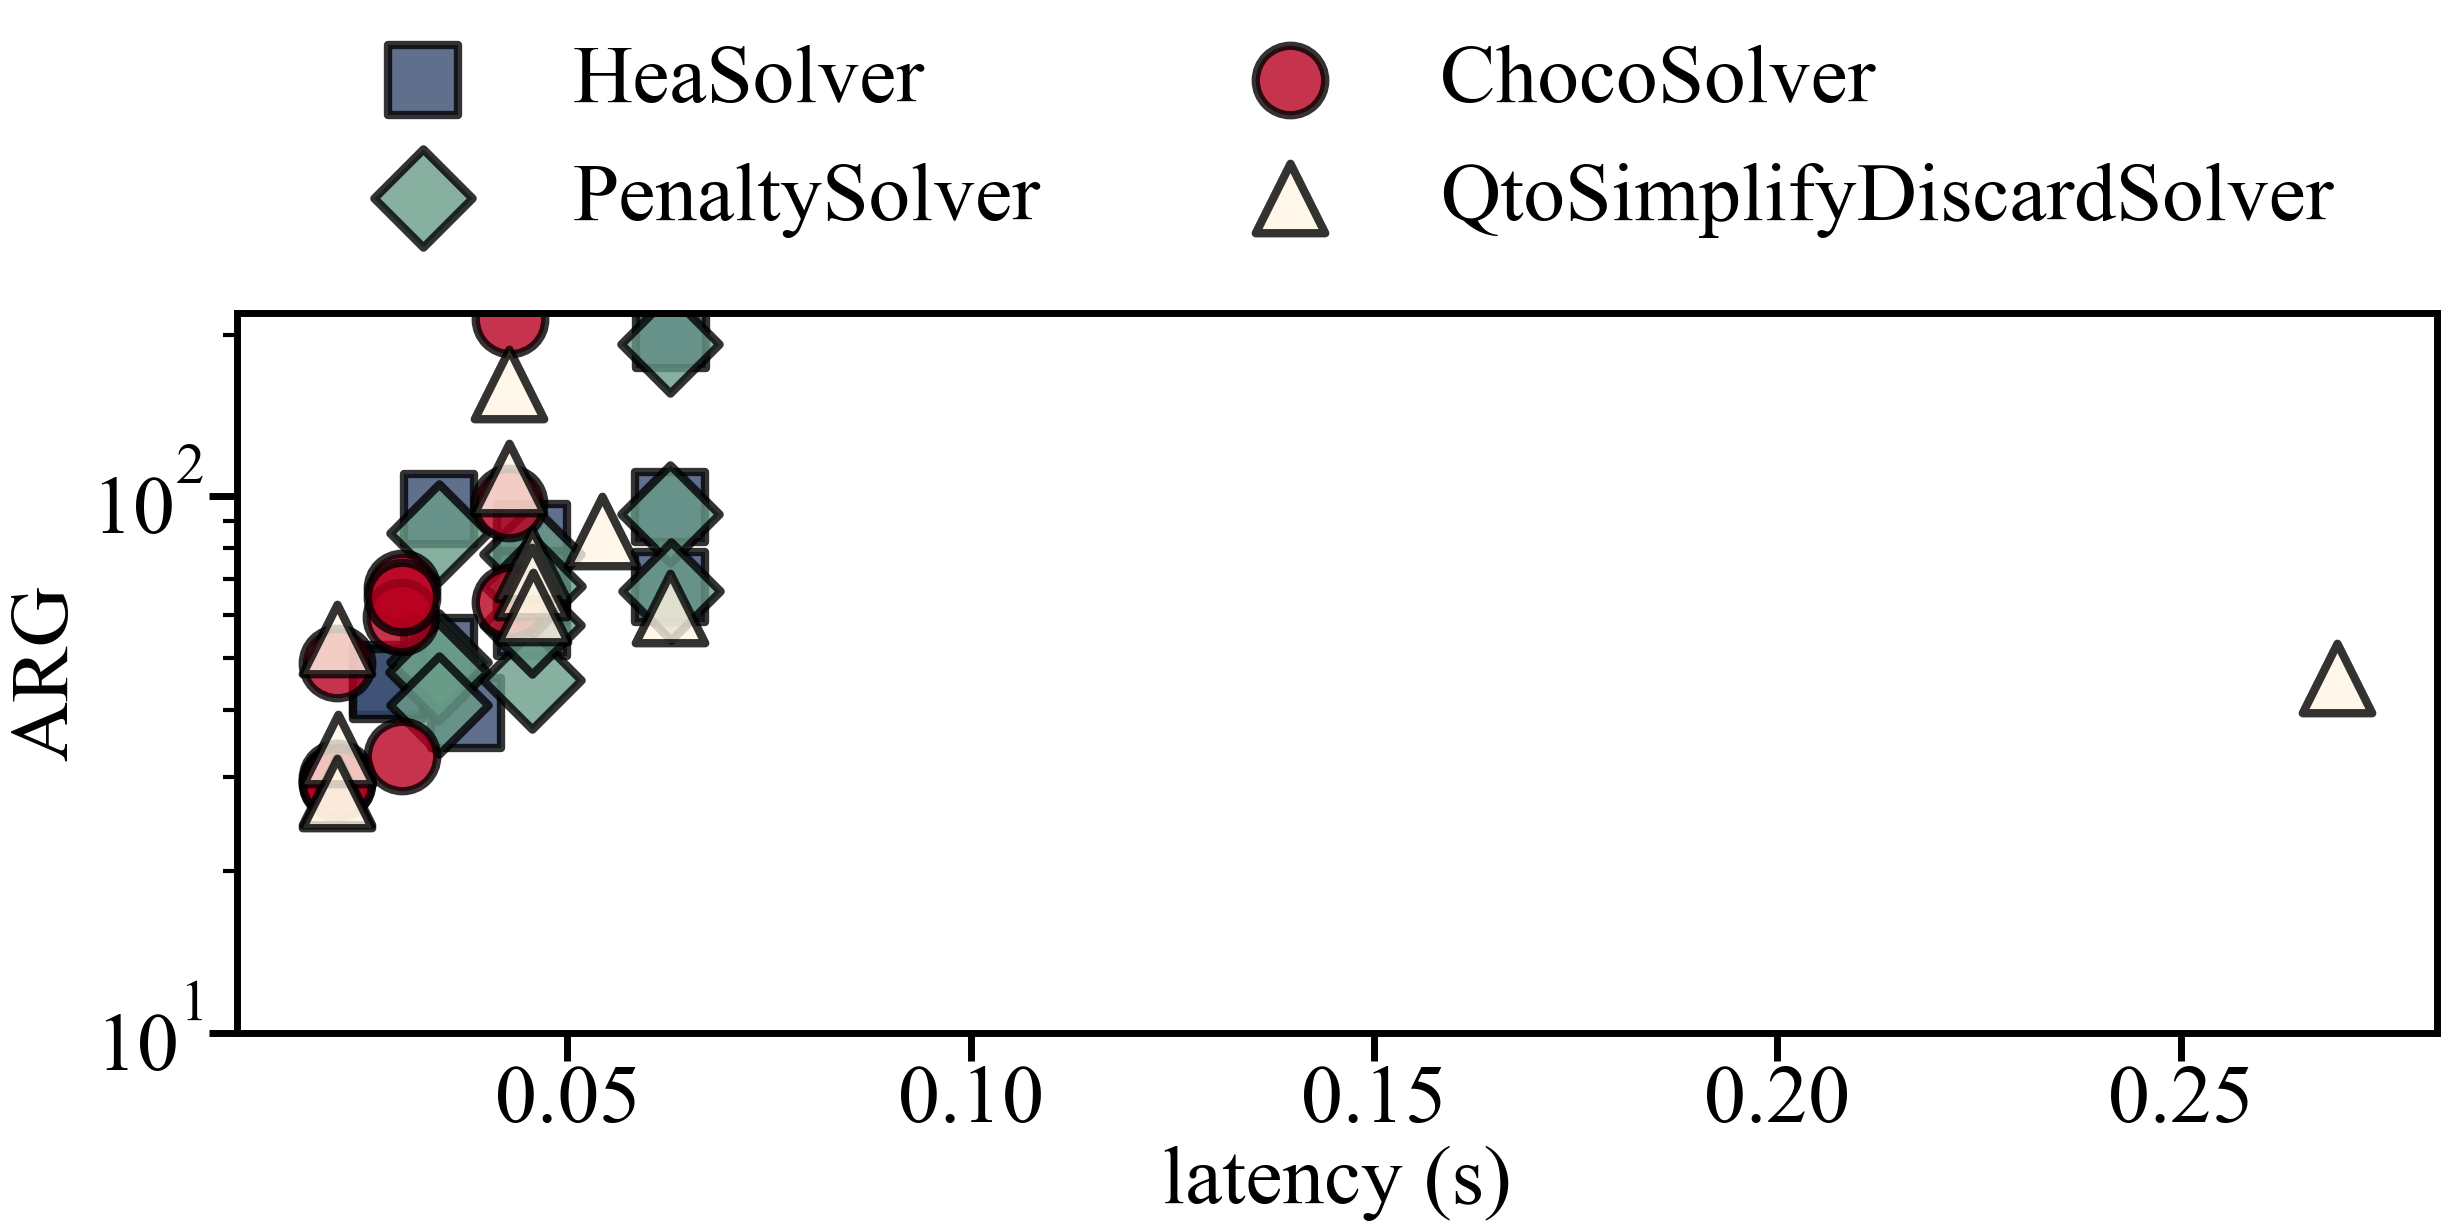

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
ax = plt.axes((0, 0, 1, 0.6))  
data = pd.read_csv('ibm_brisbane.csv')
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
data['latency'] = data['classcial']+ data['quantum']
xaxis = 'latency'
yaxis = 'ARG'
markers = ['s','D','o','^','D','*','x','+']
for i,method in enumerate(methods):
    if method in ['ChocoSolver', 'QtoSimplifyDiscardSolver']:
        print(min(data[data['method']==method][xaxis]/10000),max(data[data['method']==method][yaxis]))
    ax.scatter(data[data['method']==method][xaxis]/10000,data[data['method']==method][yaxis],label=method,color=colors[i],marker=markers[i],alpha=0.8,edgecolor='black',linewidth=6,s=2500)
plt.ylim(10,220)
plt.xlabel(xaxis+' (s)')
plt.ylabel(yaxis)
plt.yscale('log')
# ax.grid(True, linestyle='--', linewidth=1.5, axis='both')
plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2)
plt.savefig('realqpuargtime.svg',bbox_inches='tight')

[100.97180900738803]
[101.33239370784656]
[96.94728492308951]
[0.2337038889137693]
[97.21923833975552]
[92.6229364831807]
[84.38570087934738]
[0.22251914674181716]


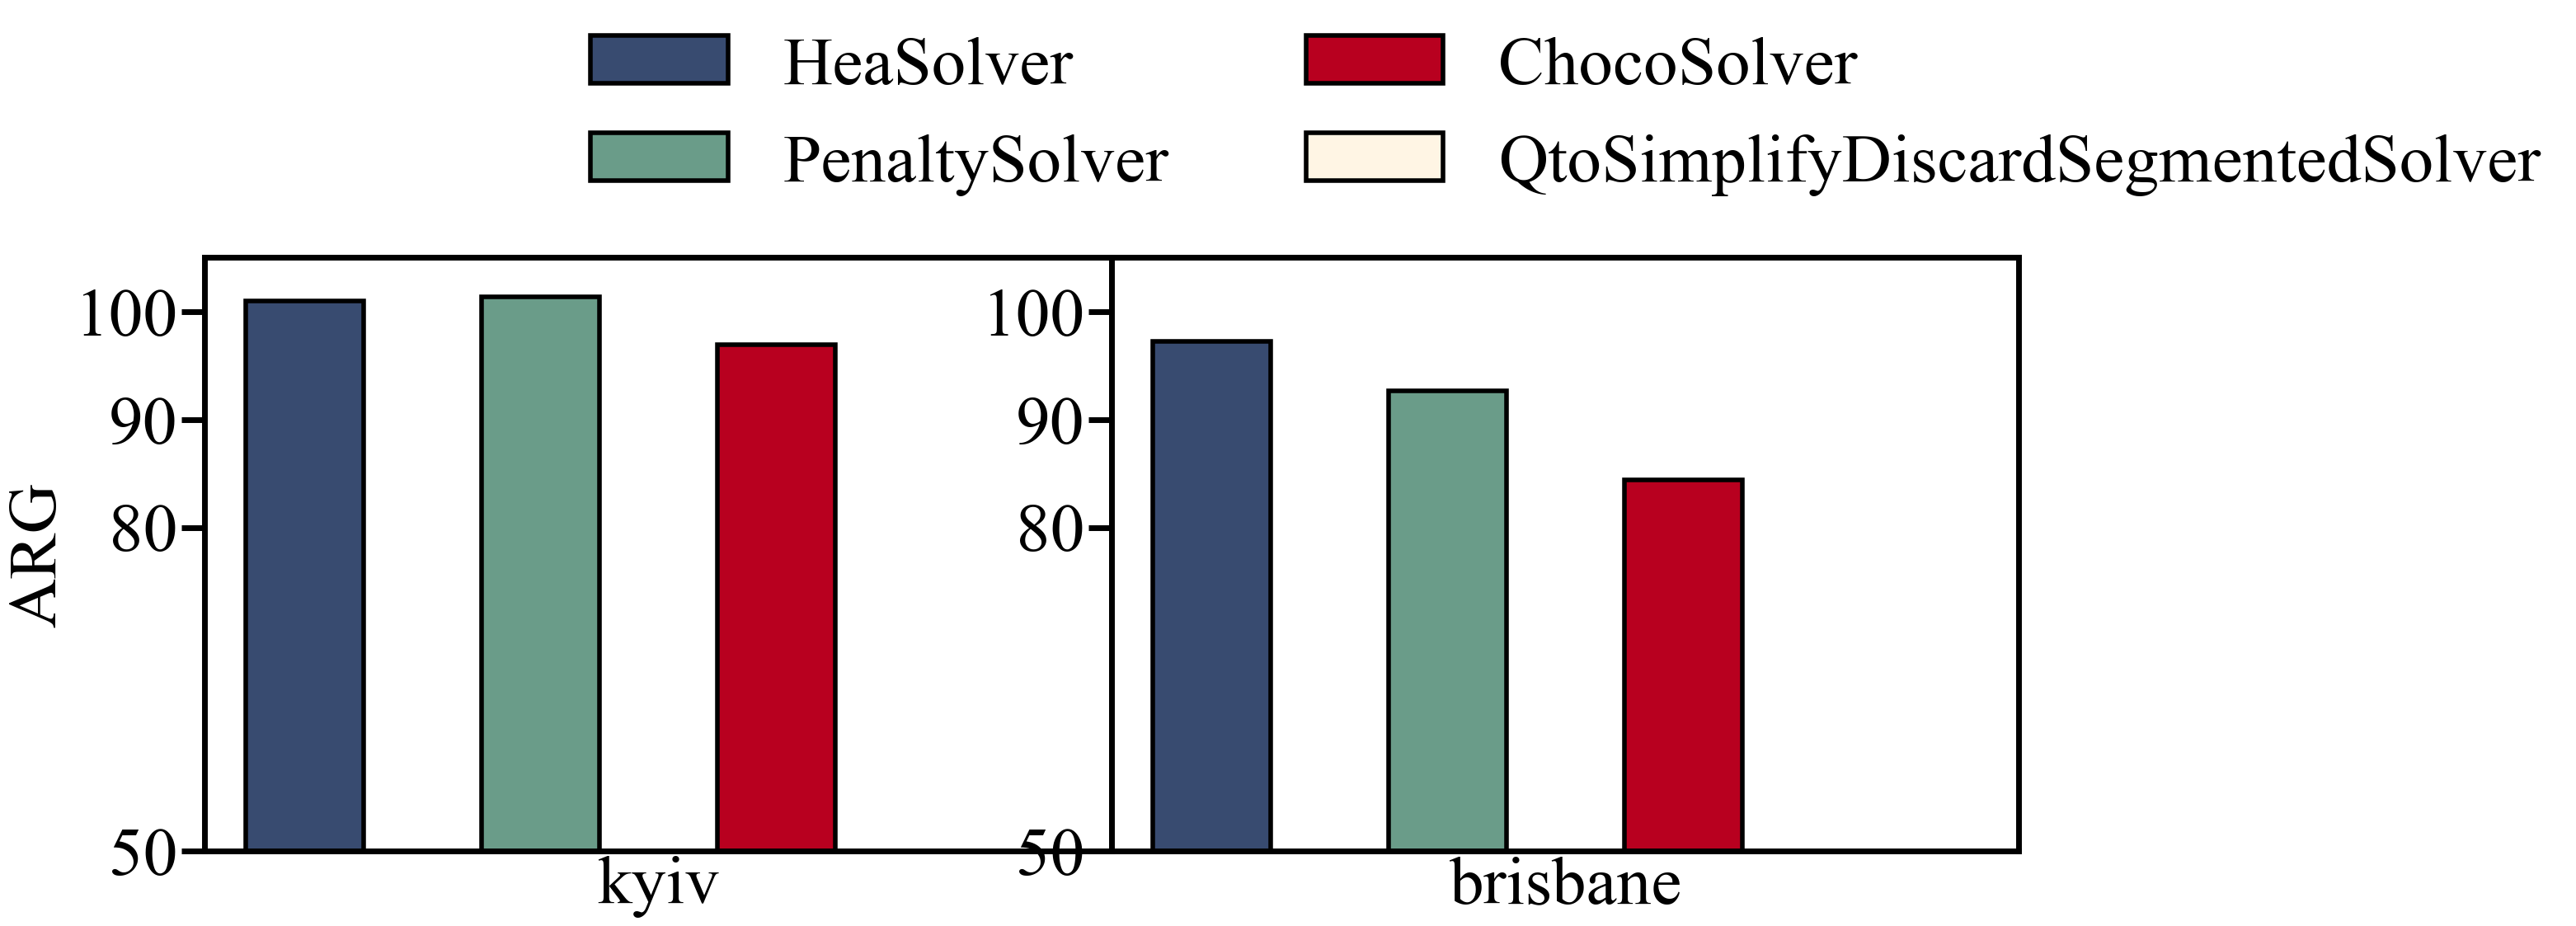

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
# 定义方法和设备
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSegmentedSolver']
locations = ['kyiv', 'brisbane']  # 分类依据：location


# 设置颜色和柱宽
move = 0.2  # 用于计算位置偏移
visible_bar_width = 0.1  # 实际柱子宽度
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['', '', '', '']
metric = 'ARG'

# 绘图
for i, location in enumerate(locations):
    ax = plt.axes((i * 0.5, 0, 0.5, 0.6))  

    for idx, method in enumerate(methods):
#         # 获取当前设备和方法的数据
        data = grouped_df_avg[grouped_df_avg['location'] == location]
        method_data = data[data['method'] == method]
        y = method_data[metric]['mean'].values.tolist()
        plt.bar(
            idx * move,  # 调整柱子位置以使分组居中
            y,
            visible_bar_width,  # 固定的显示宽度
            color=colors[idx],
            edgecolor="black",
            label=method,
            linewidth=4,
        )
        print(y)
    plt.xticks([])  # 显示 pkid 作为 x 轴
    plt.xlabel(location)
    # plt.yscale('log')
    if i == 0:
        plt.ylabel('ARG')
    else:
        plt.yticks([])

    plt.ylim(50, 105)
    
    plt.yticks([50, 80, 90, 100])

plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2)


plt.savefig('2.svg', bbox_inches='tight')
